# Problema sesión de 28 de Agosto

1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran

2.- Reescribe dicho código aprovechando el manejo de arreglos de numpy.

3.- En ambos casos muestra tus resultados usando tablas y gráficos. Compara los resultados, en terminos de los tiempos de ejecución. Puedes elegir libremente los parámetros para el péndulo.

4.- Permite que los parámetros para el pendulo puedan ser proporcionados por el usuario, y ejecutar el código desde una terminal.*

La ecuación que describe la dinámica del péndulo simple es $\frac{d^2\theta}{dt^{2}}=-\frac{g}{l}\sin{\theta}$. Como el método de Euler para solución numérica de ecuaciones diferenciales sólo es aplicable a ecuaciónes diferenciales de primer orden, se va a definir una variable para obtener dos ecuaciones diferenciales de primer orden.

Definiendo $u=\frac{d\theta}{dt}$, tenemos que $\frac{du}{dt}=-\frac{g}{l}\sin{\theta}$, así que el problema se reduce a dos ecuaciones diferenciales de primer orden.


## Solución al péndulo simple.

In [48]:
#importamos librerias que se van a utilizar
import numpy as np
import matplotlib.pyplot as plt
import math
from time import time
plt.style.use('seaborn-whitegrid')

In [49]:
#se definen condiciones iniciales y constantes para los dos procesos
l=1.
a=9.81
t0=0
tf=10
N=10000
h=abs(t0-tf/N)


### Solución sin uso de librería Numpy

El tiempo de ejecucion previo a graficar: 0.1798856258392334 s


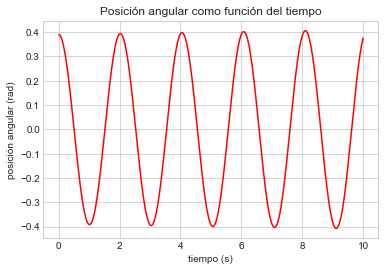

El tiempo total de cálculo y graficación: 0.6397228240966797 s


In [50]:
tiempo_inicial = time()
 
#definimos una función que produzca un vector con ceros del largo que se quiera
def vector_ceros(dimension):
    M=[]
    while len(M) <dimension:
        M.append(0.0)
    return M    

#definimos las variables con uso de la función que se hizo
u1=vector_ceros(N)
y1=vector_ceros(N)
t1=vector_ceros(N)


#condición inicial
y1[0]=0.39


#definimos las funciones que se van a utilizar en el método Euler
def f1(y1): 
    return -(a/l)*np.sin(y1)

def g1(u1):
    return u1

#método Euler de las dos ecuaciones de manera simultanea
for i in range(N-1):
    u1[i+1]=u1[i]+h*f1(y1[i])
    y1[i+1]=y1[i]+h*g1(u1[i])
    t1[i+1]=t1[i]+h
    
#calculamos el tiempo de proceso del cálculo
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print ('El tiempo de ejecucion previo a graficar:',tiempo_ejecucion, 's')

#graficamos el resultado y calculamos el tiempo final
plt.plot(t1,y1, 'r')
plt.title('Posición angular como función del tiempo')
plt.ylabel('posición angular (rad)')
plt.xlabel('tiempo (s)')
plt.show()
tiempo_grafica = time() 
tiempo_total = tiempo_grafica - tiempo_inicial
print ('El tiempo total de cálculo y graficación:',tiempo_total, 's')

### Solución con uso de la librería Numpy

El tiempo de ejecucion fue: 0.18797564506530762 s


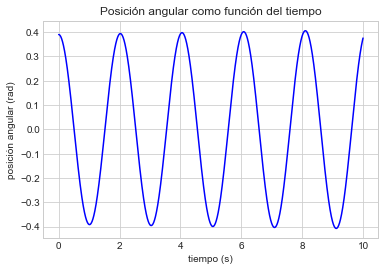

El tiempo total de cálculo y graficación: 0.6045444011688232 s


In [51]:
tiempo_inicial2 = time()

#definimos las variables con uso de la libreria numpy
u2=np.zeros(N, dtype=float)
y2=np.zeros(N, dtype=float)
t2=np.zeros(N, dtype=float)

#condición inicial
y2[0]=0.39


#definimos las funciones que se van a utilizar en el método Euler
def f2(y2): 
    return -(a/l)*np.sin(y2)

def g2(u2):
    return u2


#método Euler de las dos ecuaciones de manera simultanea
for i in range(N-1):
    u2[i+1]=u2[i]+h*f2(y2[i])
    y2[i+1]=y2[i]+h*g2(u2[i])
    t2[i+1]=t2[i]+h
    
#calculamos el tiempo de proceso del cálculo
tiempo_final2 = time() 
tiempo_ejecucion2 = tiempo_final2 - tiempo_inicial2
print ('El tiempo de ejecucion fue:',tiempo_ejecucion2, 's')


#graficamos el resultado y calculamos el tiempo final
plt.plot(t2,y2, 'b')
plt.title('Posición angular como función del tiempo')
plt.ylabel('posición angular (rad)')
plt.xlabel('tiempo (s)')
plt.show()
tiempo_grafica2 = time() 
tiempo_total2 = tiempo_grafica2 - tiempo_inicial2
print ('El tiempo total de cálculo y graficación:',tiempo_total2, 's')

### Comparación entre los dos procesos

Diferencia entre tiempo de proceso del cálculo de la solución: 0.008090019226074219 s
Diferencia entre tiempo de proceso del cálculo de la solución incluyendo la graficación: 0.035178422927856445 s


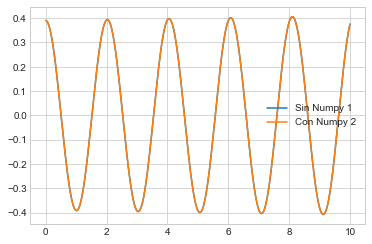

In [52]:
tiempo_ejecucion21=tiempo_ejecucion-tiempo_ejecucion2
print ('Diferencia entre tiempo de proceso del cálculo de la solución:',abs(tiempo_ejecucion21), 's')

tiempo_total21=tiempo_total-tiempo_total2
print ('Diferencia entre tiempo de proceso del cálculo de la solución incluyendo la graficación:',abs(tiempo_total21), 's')



fig, ax = plt.subplots()
ax.plot(t1,y1, label='Sin Numpy 1')
ax.plot(t1,y2, label='Con Numpy 2')
leg = ax.legend();
plt.show()